In [2]:
'''3_1 加载IMDB数据集
2019_12_5
'''
from keras.datasets import imdb

#仅仅保留训练数据前10000个最常出现的单词，低频单词将会被舍弃
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 6s 0us/step


In [3]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [4]:
train_labels[0]

1

In [6]:
max([max(sequence) for sequence in train_data])

9999

In [7]:
#word_index 是一个将单词映射为整数索引的字典
word_index = imdb.get_word_index()
#键值颠倒，将整数索引映射为单词
reversed_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
#将评论解码
#注意，索引减去了3，因为0, 1, 2是为'padding'(填充)、'start of sequence'(序列开始)
#'unknown'(未知词)分别保留的索引
decoded_review=' '.join(
    [reversed_word_index.get(i - 3, '?') for i in train_data[0]])

1646592/1641221 [==============================] - 1s 1us/step


In [8]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
'''3_2 将整数序列编码为二进制矩阵
2019_12_5
'''
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    #创建一个形状为(len(sequences), dimension)的零矩阵
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        #将results[i]的指定索引设为1
        results[i, sequence] = 1.
    return results

#将训练数据向量化
x_train = vectorize_sequences(train_data)
#将测试数据向量化
x_test = vectorize_sequences(test_data)

In [10]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [11]:
#将标签向量化
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [12]:
'''3_3 模型定义
2019_12_5
'''
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.


In [13]:
'''3_4 编译模型
2019_12_5
'''
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
                 metrics=['accuracy'])

In [14]:
'''3_5 配置优化器
2019_12_5
'''
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
'''3_6 使用自定义的损失和指标
2019_12_5
'''
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

In [16]:
'''3_7 留出验证集
2019_12_5
'''
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
'''3_8 训练模型
2019_12_5
'''
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 242us/step - loss: 0.5059 - acc: 0.7854 - val_loss: 0.3781 - val_acc: 0.8702
Epoch 2/20
15000/15000 [==============================] - 3s 178us/step - loss: 0.2995 - acc: 0.9040 - val_loss: 0.3000 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.2173 - acc: 0.9287 - val_loss: 0.3092 - val_acc: 0.8709
Epoch 4/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1745 - acc: 0.9439 - val_loss: 0.2839 - val_acc: 0.8838s - loss: 0.1757 - acc: 0.94
Epoch 5/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1419 - acc: 0.9544 - val_loss: 0.2856 - val_acc: 0.8860
Epoch 6/20
15000/15000 [==============================] - 3s 181us/step - loss: 0.1146 - acc: 0.9651 - val_loss: 0.3130 - val_acc: 0.8788
Epoch 7/20
15000/15000 [======================

In [18]:
history_dict = history.history

In [19]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

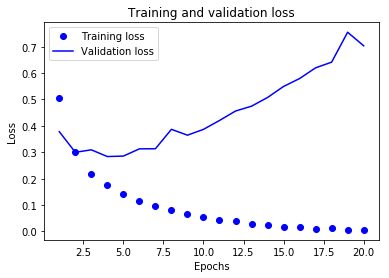

In [21]:
'''3_9 绘制训练损失和验证损失
2019_12_5
'''
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

#'bo表示蓝色圆点
plt.plot(epochs, loss_values, 'bo', label='Training loss')
#'b'表示蓝色实线
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

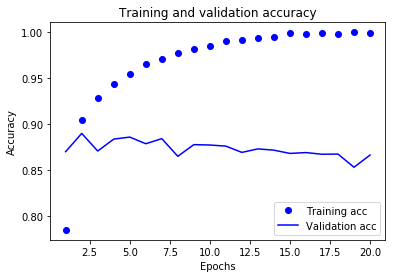

In [23]:
'''3_10 绘制训练精度和验证精度
2019_12_5
'''
#清空图像
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [36]:
'''3_11 从头开始重新训练一个模型
2019_12_5
'''
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 4s 177us/step - loss: 0.1378 - acc: 0.8096
Epoch 2/4
25000/25000 [==============================] - 4s 155us/step - loss: 0.0702 - acc: 0.9123
Epoch 3/4
25000/25000 [==============================] - 4s 157us/step - loss: 0.0514 - acc: 0.9342
Epoch 4/4
25000/25000 [==============================] - 4s 170us/step


In [35]:
results

[0.3790944742870331, 0.86088]

In [28]:
#预测评论是否为正面
model.predict(x_test[:100])

array([[1.35876268e-01],
       [9.99714255e-01],
       [2.90037751e-01],
       [6.51413560e-01],
       [9.25238431e-01],
       [6.70618176e-01],
       [9.98224914e-01],
       [6.35352731e-03],
       [9.34954762e-01],
       [9.84837234e-01],
       [8.20984542e-01],
       [3.73342633e-03],
       [1.33901834e-04],
       [5.62509894e-03],
       [9.94111478e-01],
       [1.68889761e-04],
       [8.77228856e-01],
       [5.89982927e-01],
       [4.23038006e-03],
       [4.29499745e-02],
       [9.93262053e-01],
       [9.89768982e-01],
       [1.28844857e-01],
       [8.85753870e-01],
       [7.33705819e-01],
       [9.57502007e-01],
       [8.99541378e-03],
       [9.10199583e-01],
       [9.06570673e-01],
       [3.70621681e-04],
       [9.66448665e-01],
       [7.71259069e-02],
       [8.70252967e-01],
       [3.51667404e-06],
       [1.88063085e-02],
       [1.03459656e-02],
       [9.98602033e-01],
       [9.47831035e-01],
       [8.19821060e-02],
       [1.08597875e-02],
